## Propensity Prediction: Unraveling Customer Churn Dynamics in E-commerce:
##           ~ Harnessing Data-Driven Insights for Targeted Retention Strategies


### AIM OF PROJECT:

The aim of this project is to predict customer churn in an e-commerce platform based on user interactions during their sessions. To develop a predictive model that can identify users at risk of churning and provide actionable insights to enhance businesses' precision in targeting valuable prospects, offer insights into online consumer engagement, and optimize marketing strategies.


### Table of Contents:

> - INTRODUCTION
> - DATA PREPROCESSING
> - DATA EXPLORATION
> - FEATURE SELECTION
> - TRAINING
> - EVALUATION 
> - CONCLUSIONS

### INTRODUCTION

#### Problem Statement:
The primary objective is to predict customer churn based on user interactions during sessions. 
Input features include various user events, and the output is the "Churn" column (1 for churned, 0 for not churned).

#### Future Scope:
> - Implement recommendation systems to provide personalized offers or content to users at risk of churning.
> - Explore real-time prediction and intervention strategies to prevent churn proactively.
> - Incorporate additional external data sources to improve model accuracy.
> - Continuously update and retrain the model to adapt to changing user behavior.

- Enhance targeting precision: The propensity scores from the model can identify high-value users with a greater likelihood to purchase. Marketing campaigns and promotions can be targeted towards user segments with high propensity scores to improve conversion rates.
- Offer engagement insights: Analyzing the significant user interaction features from the model can provide insights into what drives online engagement that leads to orders. For example, the model may determine that letting users save carts for later encourages more purchases. This insight can inform website design and user experience optimization.
- Optimize marketing strategies: User segments that the model identifies as less likely to purchase could be offered different promotions, content, or site experiences to influence their behavior. For example, email nudges when they leave items in their cart or customized homepage content. The model insights can iteratively improve marketing strategies.
- Personalization: User propensity scores can also drive personalized experiences, offers, and messaging tailored to individual behavior and predicted conversion levels.
In summary, the model outputs can not only make predictions but also provide actionable insights to target high-value users, understand engagement patterns, and optimize experiences to improve conversions.

Refered link is : https://www.meteorspace.com/2022/08/15/e-commerce-consumer-buying-behaviour-trends-and-statistics/#:~:text=A%20report%20released%20by%20Stackla,their%20homes%20under%20strict%20lockdowns.

72% Of e-commerce buyers want a personalized experience 
Stackla (2022), 72% of online consumers are more likely to purchase from a brand that creates a more personalized experience for them. When it comes to marketing for your online business, you need to understand that making your customers feel special can go a long way and help your business reach new heights. 

For example, if an email from your brand addresses your customer by their name, it will automatically grab their attention and they will listen to what you have to say. You can also use your packaging as a way to create a personalized experience for your customers. By adding special notes for the consumer and using your brand aesthetics, you can become more memorable and improve consumer buying behaviour

In [ ]:
# Importing the Library  
import pandas as pd;
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

### 2. DATA PREPROCESSING

In [5]:
# Reading dataset using pandas library
Cust_data = pd.read_excel("E:/Dissertation/E Commerce Dataset.xlsx",sheet_name='E Comm')

In [6]:
Cust_data

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


It can be seen there are 19 predictor variables with 5630 observations.Second column churn is a response variable.

>Description of Each variables in dataset.
> - ***CustomerID:*** Unique identifier for each customer.
> - ***Churn:*** The response variable indicating whether the customer has churned (1 for churned, 0 for not churned).
> - ***Tenure:*** The number of months the customer has been with the company.
> - ***PreferredLoginDevice:*** The preferred device for logging in (e.g., Mobile Phone, Computer, etc.).
> - ***CityTier:*** The tier of the city where the customer resides (e.g., 1 for Tier 1, 2 for Tier 2, etc.).
> - ***WarehouseToHome:*** The distance (in kilometers) from the warehouse to the customer's home.
> - ***PreferredPaymentMode:*** The customer's preferred payment mode (e.g., Debit Card, UPI, etc.).
> - ***Gender:*** The gender of the customer (e.g., Male, Female).
> - ***HourSpendOnApp:*** The number of hours the customer spends on the mobile app.
> - ***NumberOfDeviceRegistered:*** The number of devices registered by the customer.
> - ***PreferedOrderCat:*** The preferred category for ordering (e.g., Laptop & Accessory, Mobile, etc.).
> - ***SatisfactionScore:*** The satisfaction score of the customer.
> - ***MaritalStatus:*** The marital status of the customer (e.g., Single, Divorced, etc.).
> - ***NumberOfAddress:*** The number of addresses associated with the customer.
> - ***Complain:*** Indicates whether the customer has made a complaint (1 for yes, 0 for no).
> - ***OrderAmountHikeFromlastYear:*** The percentage increase in order amount from the previous year.
> - ***CouponUsed:*** The number of coupons used by the customer.
> - ***OrderCount:*** The total number of orders placed by the customer.
> - ***DaySinceLastOrder:*** The number of days since the customer's last order.
> - ***CashbackAmount:*** The amount of cashback received by the customer.

Aim in this dataset is to predict customer churn based on the provided predictor variables.

The target variable :

'Churn' indicates whether a customer has churned = 1 , not churned = 0.



#### 2.1 Data Collection

In [7]:
data_pre = Cust_data.copy()

In [8]:
# Basic Dataset information
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

#### 2.2 Checking for missing values

In [9]:
# Check for missing values in each column
missing_values = data_pre.isnull().sum()
missing_values

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Data description

In [10]:
descriptive_stats = data_pre.describe()

descriptive_stats


,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In the provided dataset, several columns have missing values. Specifically, the 'Tenure' column has 264 missing values, 'WarehouseToHome' has 251 missing values, 'HourSpendOnApp' has 255 missing values, 'OrderAmountHikeFromlastYear' has 265 missing values, 'CouponUsed' has 256 missing values, 'OrderCount' has 258 missing values, and 'DaySinceLastOrder' has 307 missing values. To prepare the dataset for analysis, it's essential to handle these missing values appropriately. 

In [11]:
Remove_miss_copy = data_pre.copy()

#### 2.3 After Removing Missing Values

In [12]:
# Load the dataset (assuming df is the DataFrame holding your data)
# Replace 'your_dataset.csv' with the actual file path or name
df_after_miss = Remove_miss_copy

# Remove rows with missing values
df_after_miss.dropna(inplace=True)

df_after_miss


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
11,50012,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,153.81
12,50013,1,0.0,Phone,1,11.0,COD,Male,2.0,3,Mobile,3,Single,2,1,13.0,2.0,2.0,2.0,134.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,55625,0,1.0,Mobile Phone,3,12.0,UPI,Female,2.0,5,Mobile Phone,3,Single,2,0,19.0,2.0,2.0,1.0,154.66
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


Given that Dataset initially had 5630 observations and now left with 3774 after removing missing values, lost approximately 33% of the data. This is a significant proportion. If the missing values are not random, or if they represent a significant subset of the population you are interested in, then removing them might not be a good idea.

#### Check if the missing values are random or if they represent a significant subset

#### 1.Using Visualization

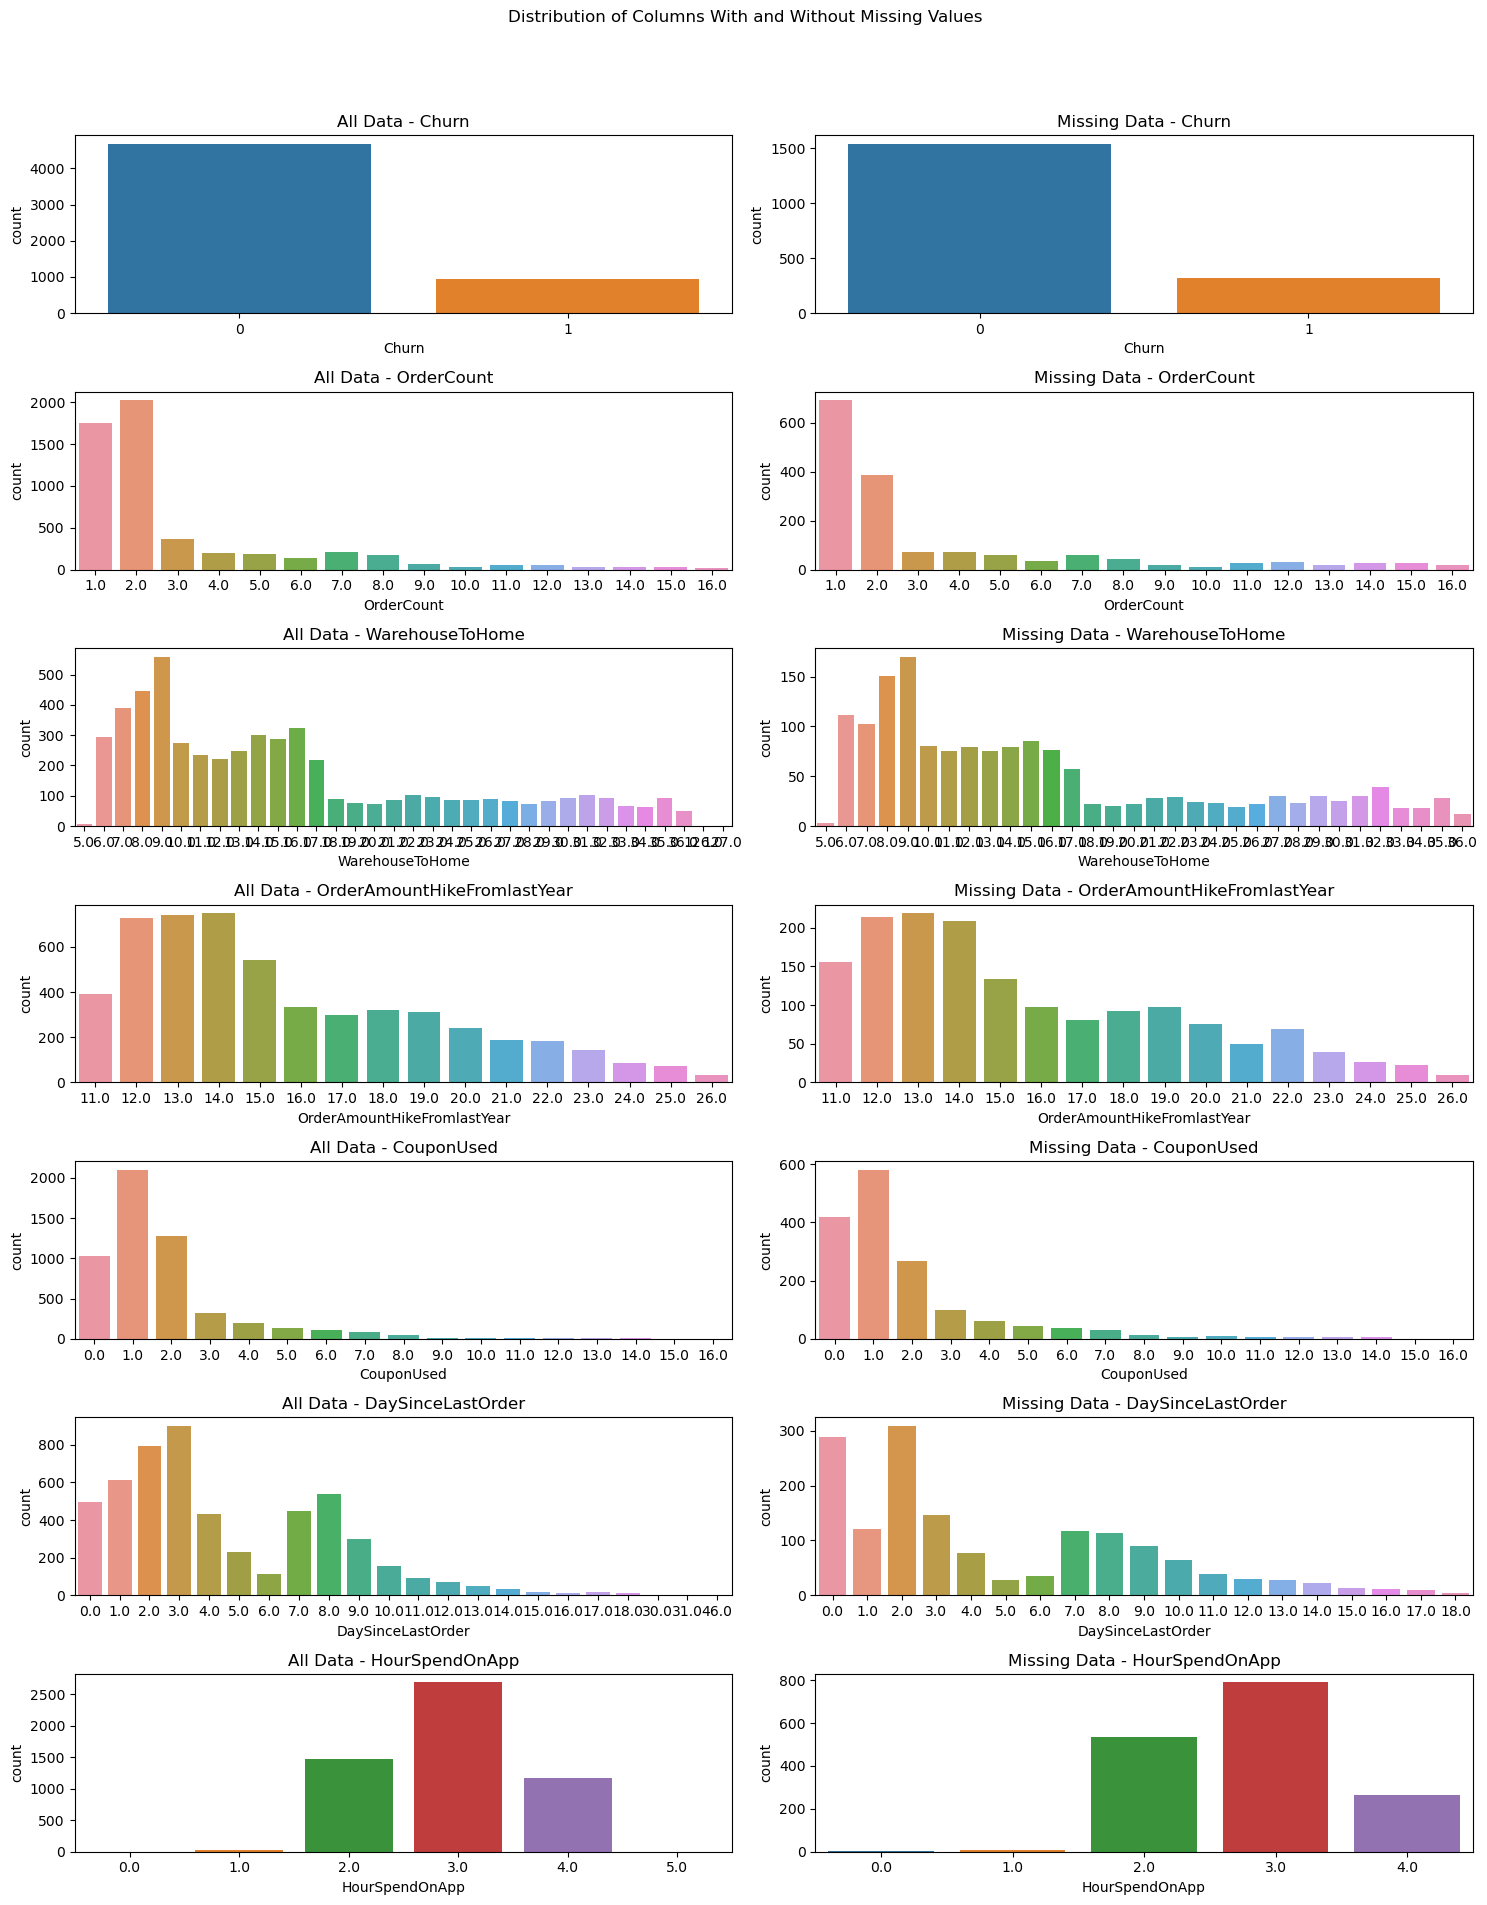

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if the missing values are random or if they represent a significant subset
# of the population by comparing the distribution of variables with and without missing values.

# Create a DataFrame with an additional column indicating if any value in the row is missing
data_pre['HasMissing'] = data_pre.apply(lambda row: row.isnull().any(), axis=1)

# Plot the distribution of some columns to compare between rows with and without missing values
columns_to_check = ['Churn' , 'OrderCount' , 'WarehouseToHome' , 'OrderAmountHikeFromlastYear','CouponUsed','DaySinceLastOrder','HourSpendOnApp']

fig, axes = plt.subplots(len(columns_to_check), 2, figsize=(15, 20))
fig.suptitle("Distribution of Columns With and Without Missing Values")

for i, col in enumerate(columns_to_check):
    sns.countplot(data=data_pre, x=col, ax=axes[i, 0])
    axes[i, 0].set_title(f'All Data - {col}')
    
    sns.countplot(data=data_pre[data_pre['HasMissing'] == True], x=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'Missing Data - {col}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


The side-by-side plots show the distribution of selected columns for all data points (left column) and for rows containing at least one missing value (right column).

Here are some observations:

Churn: The distribution of the 'Churn' variable appears somewhat similar between the full dataset and the subset with missing values.
Tenure: The distribution in the subset with missing values does not seem drastically different from the full dataset.
CityTier: Similar distributions are observed in both the full dataset and the subset.
Gender: The gender distribution is also similar in both cases.
SatisfactionScore: Slight differences can be observed but are not very significant.
MaritalStatus: The distribution in the subset with missing values appears to follow the same pattern as the full dataset.
From these plots, it seems that the missing values do not represent a significantly different subset of the population, at least for these variables. The missing values appear to be mostly random in nature, based on these distributions.

However, this is a preliminary analysis, and more advanced statistical tests could provide additional insights.

Churn: Since this could be the target variable for predictive modeling, understanding its distribution in the subset with missing values is crucial.

Tenure, CityTier, Gender, SatisfactionScore, MaritalStatus: These variables were chosen as they are likely to be important features for any model predicting churn. Additionally, they cover a mix of numerical and categorical types and could represent different aspects of the customer profile.

The objective was to get a quick overview of whether the subset with missing values differs significantly from the complete dataset across a range of variables. However, you could certainly extend this analysis to include other variables if they are important for your specific use case.

#### 2.Using Hypothesis Tests

In [57]:
# 3. Hypothesis Tests
# Perform t-tests for numerical columns to compare the distributions

from scipy.stats import ttest_ind 
ttest_results = {}
numerical_columns = data_pre.select_dtypes(include=['number']).columns

for col in numerical_columns:
    # Skip if the column was created just to indicate missingness
    if col == 'HasMissing':
        continue
    
    # Perform t-test
    t_stat, p_val = ttest_ind(data_pre[col].dropna(), df_after_miss[col].dropna(), equal_var=False)
    ttest_results[col] = p_val

# Display t-test results
ttest_results


{'CustomerID': 2.663269683979136e-09,
 'Churn': 0.8799621424886223,
 'Tenure': 1.6831964899468827e-16,
 'CityTier': 0.006629250405803051,
 'WarehouseToHome': 0.5680589460668762,
 'HourSpendOnApp': 0.0012088499964858239,
 'NumberOfDeviceRegistered': 0.0025304097398586765,
 'SatisfactionScore': 0.7227092524692693,
 'NumberOfAddress': 0.9638805612261545,
 'Complain': 0.7751341989914666,
 'OrderAmountHikeFromlastYear': 0.7995201011352057,
 'CouponUsed': 0.40376943552611555,
 'OrderCount': 0.001299035810597936,
 'DaySinceLastOrder': 0.8163261783050615,
 'CashbackAmount': 5.748756518508318e-64}

1. CustomerId can be ignored because its just Id to find the customer in database.
2. Churn: p=0.879 - No significant difference
3. Tenure: p<0.001 - Significant difference
4. CityTier: p<0.001 - Significant difference
5. WarehouseToHome: p=0.568 - No significant difference
6. HourSpendOnApp: p<0.001 - Significant difference
7. NumberOfDeviceRegistered: p<0.001 - Significant difference
8. SatisfactionScore: p=0.722 - No significant difference
9. NumberOfAddress: p=0.96 - No significant difference
10. Complain: p=0.775 - No significant difference
11.	OrderAmountHikeFromlastYear: p=0.799 - No significant difference
12.	CouponUsed: p=0.403 - No significant difference
13.	OrderCount: p<0.001 - Significant difference
14.	DaySinceLastOrder: p=0.816 - No significant difference
15.	CashbackAmount: p<0.001 - Significant difference


A low p-value (< 0.05) suggests that the distributions are significantly different, and the data might not be missing at random. Based on these results, columns like CustomerID, Tenure, CityTier, HourSpendOnApp, NumberOfDeviceRegistered, OrderCount, and CashbackAmount show significant differences in their distributions between rows with and without missing values.

This further strengthens the case that the missing values in your dataset are not completely random, especially for certain variables.

### Imputation to handle missing values

Some machine learning algorithms like Random Forest and XGBoost can handle missing values without requiring imputation. However, this limits to use only these specific algorithms for modeling.
Hence K-Nearest Neighbors (KNN) Imputation: This method finds the k-nearest neighbors to a data point with a missing value and fills in that value based on the average (or weighted average) of these neighbors. KNN is computationally expensive but usually provides a more accurate imputation.

In [18]:
from sklearn.impute import KNNImputer
import pandas as pd

# Initialize KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Select only numerical columns as KNN is applicable only to numerical values
numerical_data = data_pre.select_dtypes(include=['number'])

# Perform imputation
imputed_data = knn_imputer.fit_transform(numerical_data)

# Convert the result back to DataFrame
imputed_data_df = pd.DataFrame(imputed_data, columns=numerical_data.columns)

# Merge imputed numerical data back with original categorical data
#final_data = pd.concat([data_pre.select_dtypes(exclude=['number']), imputed_data_df], axis=1)


# Check if the missing values are imputed in the numerical columns
print(imputed_data_df.isnull().sum())


CustomerID                     0
Churn                          0
Tenure                         0
CityTier                       0
WarehouseToHome                0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
SatisfactionScore              0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


So after Imputation missing values are zero

In [19]:
imputed_data_df

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001.0,1.0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,1.0,5.0,159.93
1,50002.0,1.0,2.6,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,1.0,0.0,120.90
2,50003.0,1.0,2.6,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,1.0,3.0,120.28
3,50004.0,1.0,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,1.0,3.0,134.07
4,50005.0,1.0,0.0,1.0,12.0,2.6,3.0,5.0,3.0,0.0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626.0,0.0,10.0,1.0,30.0,3.0,2.0,1.0,6.0,0.0,18.0,1.0,2.0,4.0,150.71
5626,55627.0,0.0,13.0,1.0,13.0,3.0,5.0,5.0,6.0,0.0,16.0,1.0,2.0,3.2,224.91
5627,55628.0,0.0,1.0,1.0,11.0,3.0,2.0,4.0,3.0,1.0,21.0,1.0,2.0,4.0,186.42
5628,55629.0,0.0,23.0,3.0,9.0,4.0,5.0,4.0,4.0,0.0,15.0,2.0,2.0,9.0,178.90


#### Checking for Duplicates

In [20]:
# Check for duplicate rows in the dataset
duplicate_rows = Cust_data.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

num_duplicate_rows


0

It appears that there are no duplicate rows in dataset. This is a good sign for data integrity.

#### Checking Outliers numerically

In [21]:
import numpy as np  # Importing NumPy library
from scipy.stats import zscore


# Calculate the Z-scores of each data point in the numerical columns
z_scores = np.abs(zscore(imputed_data_df))

# Get boolean array indicating the presence of outliers
outliers = (z_scores > 3)

# Count the number of outliers in each column
outliers_count = pd.DataFrame(outliers, columns=numerical_data.columns).sum()

outliers_count


CustomerID                       0
Churn                            0
Tenure                           4
CityTier                         0
WarehouseToHome                  2
HourSpendOnApp                   3
NumberOfDeviceRegistered         0
SatisfactionScore                0
NumberOfAddress                  4
Complain                         0
OrderAmountHikeFromlastYear      0
CouponUsed                     106
OrderCount                     176
DaySinceLastOrder               43
CashbackAmount                  11
dtype: int64

Here's the count of outliers for each numerical column in dataset, based on the Z-score method with a threshold of 3:

- Tenure: 4 outliers
- WarehouseToHome: 2 outliers
- HourSpendOnApp: 3 outliers
- NumberOfAddress: 4 outliers
- CouponUsed: 106 outliers
- OrderCount: 176 outliers
- DaySinceLastOrder: 43 outliers
- CashbackAmount: 11 outliers

Tenure, WarehouseToHome, HourSpendOnApp, CashbackAmount and NumberOfAddress, : These columns have relatively few outliers. Lets consider capping these outliers to the nearest non-outlier value or the 1.5 * IQR value.

CouponUsed, OrderCount, and DaySinceLastOrder: These columns have multiple outliers. Since there are many, removal might lead to loss of a lot of data. Transformation (like log or square root) could be a better option to minimize their impact. 

#### Applying imputation

In [22]:
# Let's try again to cap the outliers for the columns with relatively fewer outliers
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_limit, lower_limit, data[column])
    data[column] = np.where(data[column] > upper_limit, upper_limit, data[column])
    return data

# Columns with fewer outliers
cols_to_cap = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'CashbackAmount', 'NumberOfAddress']

# Applying capping for these columns
for col in cols_to_cap:
    imputed_data_df = cap_outliers(imputed_data_df, col)

# Transforming columns with multiple outliers using log transformation
cols_to_transform = ['CouponUsed', 'OrderCount', 'DaySinceLastOrder']
imputed_data_df[cols_to_transform] = np.log1p(imputed_data_df[cols_to_transform])

# Display the first few rows to verify changes
imputed_data_df.head()


,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001.0,1.0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,0.693147,0.693147,1.791759,159.93
1,50002.0,1.0,2.6,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.000000,0.693147,0.000000,120.90
2,50003.0,1.0,2.6,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.000000,0.693147,1.386294,120.28
3,50004.0,1.0,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.000000,0.693147,1.386294,134.07
4,50005.0,1.0,0.0,1.0,12.0,2.6,3.0,5.0,3.0,0.0,11.0,0.693147,0.693147,1.386294,129.60


In [25]:
final_data

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,HasMissing,CustomerID,Churn,Tenure,CityTier,...,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single,False,50001.0,1.0,4.0,3.0,...,3.0,3.0,2.0,9.0,1.0,11.0,0.693147,0.693147,1.791759,159.93
1,Phone,UPI,Male,Mobile,Single,True,50002.0,1.0,2.6,1.0,...,3.0,4.0,3.0,7.0,1.0,15.0,0.000000,0.693147,0.000000,120.90
2,Phone,Debit Card,Male,Mobile,Single,True,50003.0,1.0,2.6,1.0,...,2.0,4.0,3.0,6.0,1.0,14.0,0.000000,0.693147,1.386294,120.28
3,Phone,Debit Card,Male,Laptop & Accessory,Single,False,50004.0,1.0,0.0,3.0,...,2.0,4.0,5.0,8.0,0.0,23.0,0.000000,0.693147,1.386294,134.07
4,Phone,CC,Male,Mobile,Single,True,50005.0,1.0,0.0,1.0,...,2.6,3.0,5.0,3.0,0.0,11.0,0.693147,0.693147,1.386294,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married,False,55626.0,0.0,10.0,1.0,...,3.0,2.0,1.0,6.0,0.0,18.0,0.693147,1.098612,1.609438,150.71
5626,Mobile Phone,Credit Card,Male,Fashion,Married,True,55627.0,0.0,13.0,1.0,...,3.0,5.0,5.0,6.0,0.0,16.0,0.693147,1.098612,1.435085,224.91
5627,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married,False,55628.0,0.0,1.0,1.0,...,3.0,2.0,4.0,3.0,1.0,21.0,0.693147,1.098612,1.609438,186.42
5628,Computer,Credit Card,Male,Laptop & Accessory,Married,False,55629.0,0.0,23.0,3.0,...,4.0,5.0,4.0,4.0,0.0,15.0,1.098612,1.098612,2.302585,178.90


In [24]:
final_data = pd.concat([data_pre.select_dtypes(exclude=['number']), imputed_data_df], axis=1)

In [26]:
final_data_copy = final_data.copy()

In [27]:
final_data_copy

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,HasMissing,CustomerID,Churn,Tenure,CityTier,...,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single,False,50001.0,1.0,4.0,3.0,...,3.0,3.0,2.0,9.0,1.0,11.0,0.693147,0.693147,1.791759,159.93
1,Phone,UPI,Male,Mobile,Single,True,50002.0,1.0,2.6,1.0,...,3.0,4.0,3.0,7.0,1.0,15.0,0.000000,0.693147,0.000000,120.90
2,Phone,Debit Card,Male,Mobile,Single,True,50003.0,1.0,2.6,1.0,...,2.0,4.0,3.0,6.0,1.0,14.0,0.000000,0.693147,1.386294,120.28
3,Phone,Debit Card,Male,Laptop & Accessory,Single,False,50004.0,1.0,0.0,3.0,...,2.0,4.0,5.0,8.0,0.0,23.0,0.000000,0.693147,1.386294,134.07
4,Phone,CC,Male,Mobile,Single,True,50005.0,1.0,0.0,1.0,...,2.6,3.0,5.0,3.0,0.0,11.0,0.693147,0.693147,1.386294,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married,False,55626.0,0.0,10.0,1.0,...,3.0,2.0,1.0,6.0,0.0,18.0,0.693147,1.098612,1.609438,150.71
5626,Mobile Phone,Credit Card,Male,Fashion,Married,True,55627.0,0.0,13.0,1.0,...,3.0,5.0,5.0,6.0,0.0,16.0,0.693147,1.098612,1.435085,224.91
5627,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married,False,55628.0,0.0,1.0,1.0,...,3.0,2.0,4.0,3.0,1.0,21.0,0.693147,1.098612,1.609438,186.42
5628,Computer,Credit Card,Male,Laptop & Accessory,Married,False,55629.0,0.0,23.0,3.0,...,4.0,5.0,4.0,4.0,0.0,15.0,1.098612,1.098612,2.302585,178.90


final_data_copy will be used for modeling.

### 3. Data Visualization

final_data for Data Visualization

### 3.1. Co-relation Analysis

Only for this case use final_data_copy as it requires all column values to be numerical.

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Dropping Columns HasMissing and CustomerID
Corr_data = final_data_copy.drop(['HasMissing','CustomerID'], axis =1)

# Calculate the correlation matrix
corr_matrix = Corr_data.corr()

In [37]:
Corr_data

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single,1.0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,0.693147,0.693147,1.791759,159.93
1,Phone,UPI,Male,Mobile,Single,1.0,2.6,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.000000,0.693147,0.000000,120.90
2,Phone,Debit Card,Male,Mobile,Single,1.0,2.6,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.000000,0.693147,1.386294,120.28
3,Phone,Debit Card,Male,Laptop & Accessory,Single,1.0,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.000000,0.693147,1.386294,134.07
4,Phone,CC,Male,Mobile,Single,1.0,0.0,1.0,12.0,2.6,3.0,5.0,3.0,0.0,11.0,0.693147,0.693147,1.386294,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married,0.0,10.0,1.0,30.0,3.0,2.0,1.0,6.0,0.0,18.0,0.693147,1.098612,1.609438,150.71
5626,Mobile Phone,Credit Card,Male,Fashion,Married,0.0,13.0,1.0,13.0,3.0,5.0,5.0,6.0,0.0,16.0,0.693147,1.098612,1.435085,224.91
5627,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married,0.0,1.0,1.0,11.0,3.0,2.0,4.0,3.0,1.0,21.0,0.693147,1.098612,1.609438,186.42
5628,Computer,Credit Card,Male,Laptop & Accessory,Married,0.0,23.0,3.0,9.0,4.0,5.0,4.0,4.0,0.0,15.0,1.098612,1.098612,2.302585,178.90


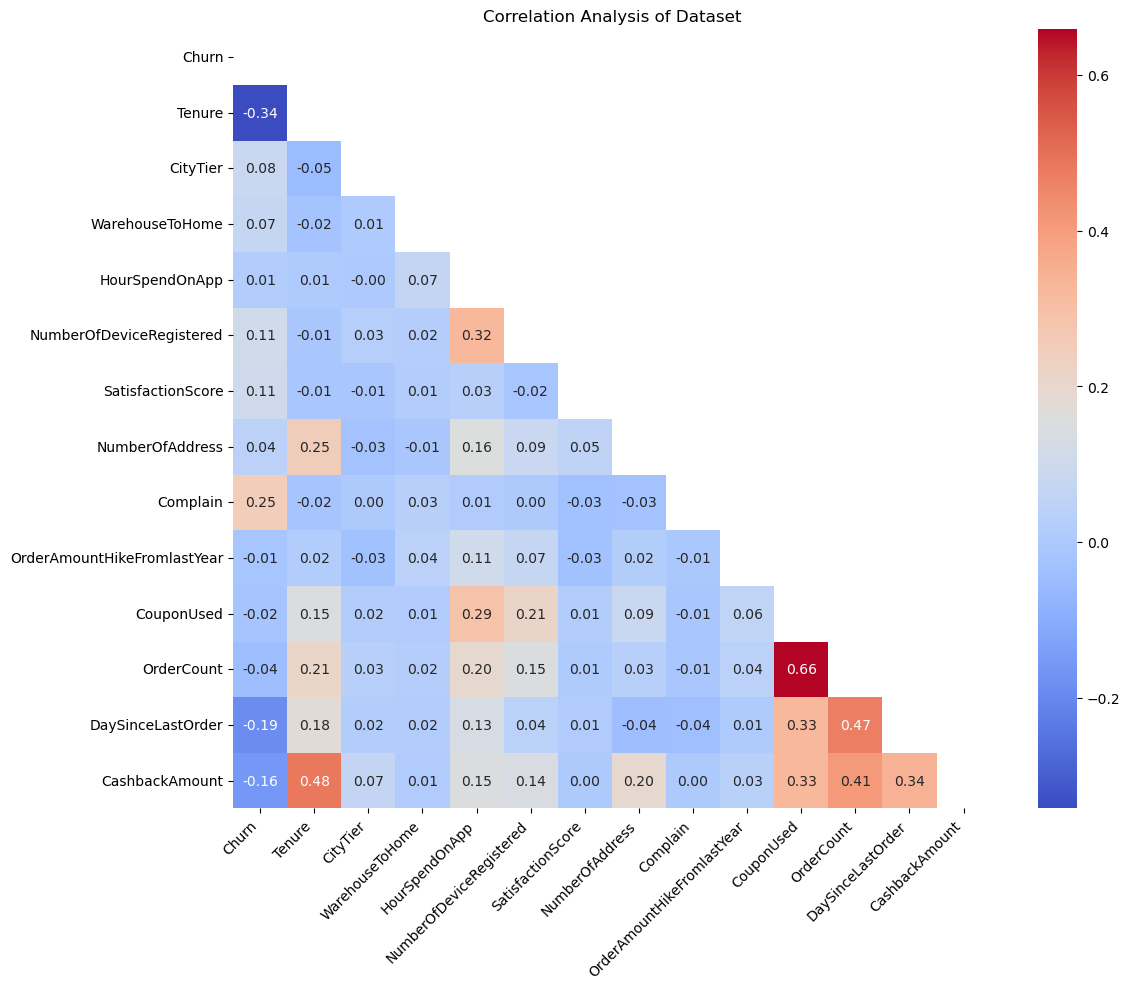

In [29]:
# Adjust the code to generate a heatmap of the lower triangle of the correlation matrix only

# Mask to display only one side of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))



# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Analysis of Dataset')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

As shown in below figure , none of the variables have high absolute values, which indicate there is not pair of features to analyse for redundancy for their stron predictive relationship with the target variable. Columns such as CityTier, WarehouseToHome, HoursSpendOnApp, NumberOfAddress, AmountHikeFromlastYear, CouponUsed, OrderCount have values close to 0, Indicating lack of linear relationship with the target variable. But still it is useful until more analysis is done on these columns and proved non-significant. Variable CashbackAmount has a correlation coefficient of 0.63 with PreferedOrderCat, indicating a customer purchase pattern such as a tendency to spend more on certain categories that offer more cashback. Variable OrderCount has a correlation coefficient of 0.66 with CouponUsed, if customers are placing more orders, when they have coupons suggest that coupons are effective in promoting addistional purchases. As this will lead to increase in profit of a company its important to consider this insight. Variable Tenure has a correlation coefficient of 0.48 with CashbackAmount, Longer Tenure is associated with higher levels of customer engagement with the company which could lead to customers taking more advantage of cashback offers. This suggestes that long term customers are either more aware of such benefits or are offered more cashback.Variable Tenure has a correlation coefficient of -0.34 with Churn, In terms of Customer retention this suggestes that customers who have stayed for long time are more satisfied or have more reasons to continue relationship with company.And knowing that customers with short tenure are more likely to churn,the company can develop retention strategies to satisfy customers more effectively. This insight can help to understand business strategies, and the importance of building long term customer relationships over finding new customers. Variable CashbackAmount has a correlation coefficient of -0.27 with PreferredLoginDevice, the negative correlation might say that users with certain types of device receive less cashback. But as the PreferredLoginDevice is categorial its difficult to conclude anything in this section , hence further analysis is required.


### 3.2Categorical Analysis

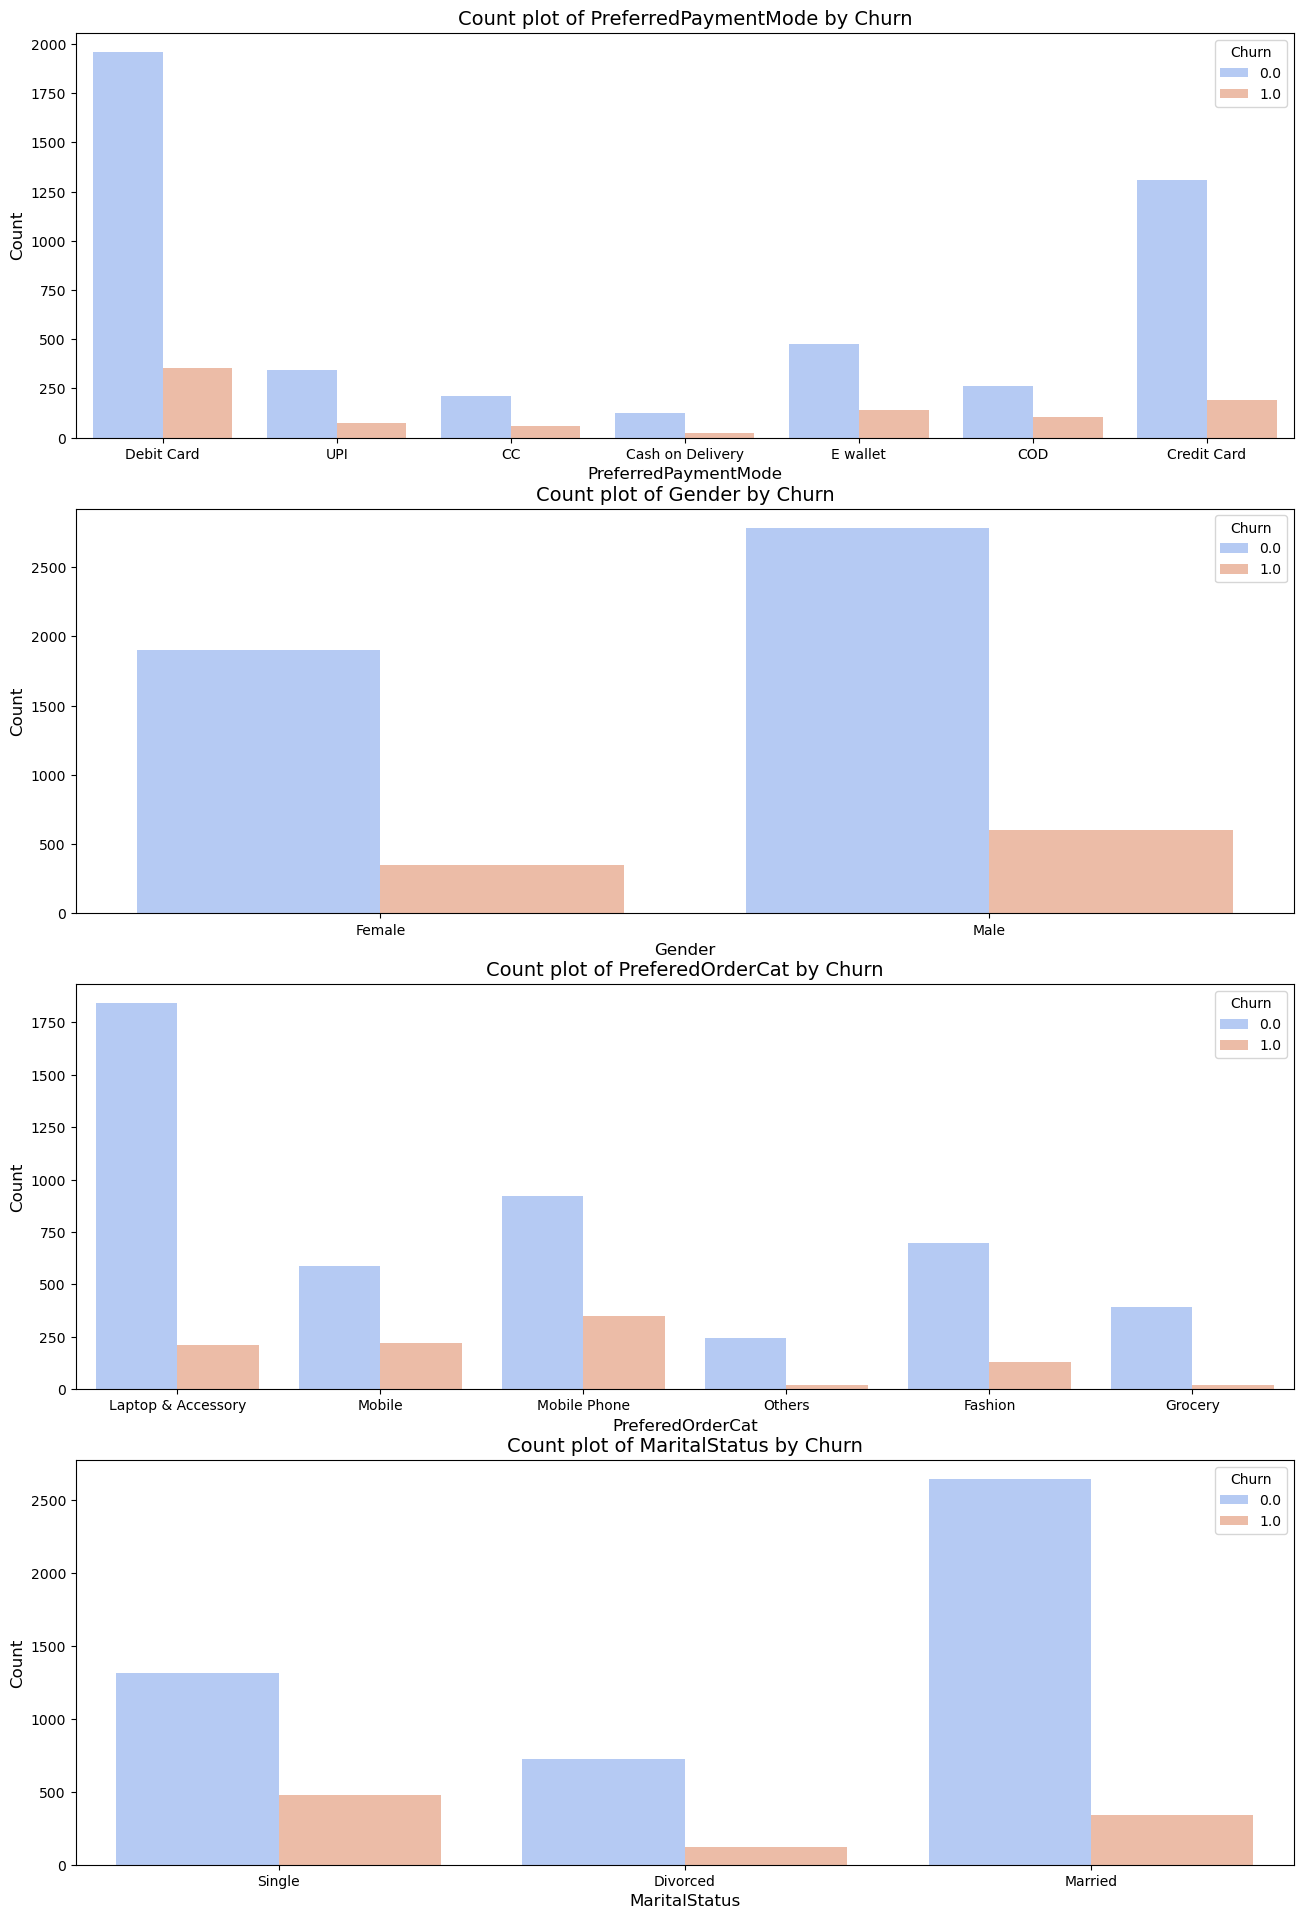

In [38]:
# Recreating the plots without the first plot (which is for 'Churn') and with horizontal x-axis labels

# We will recreate the subplot for the remaining categorical columns with respect to the churn field
fig, axes = plt.subplots(nrows=len(categorical_columns)-1, ncols=1, figsize=(14, 20))  # Adjusted the number of rows

# Adjust the layout
plt.tight_layout(pad=5.0, h_pad=3.0)


# For each of the remaining categorical columns, we create a count plot segmented by churn
for i, col in enumerate(categorical_columns[1:]):  # Skip the first column which is 'Churn'
    sns.countplot(x=col, hue='Churn', data=final_data , ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'Count plot of {col} by Churn', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].legend(title='Churn', loc='upper right')
    # Set the x-axis labels to horizontal
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)

# Show the plots
plt.show()

Visualization in terms of percentage.

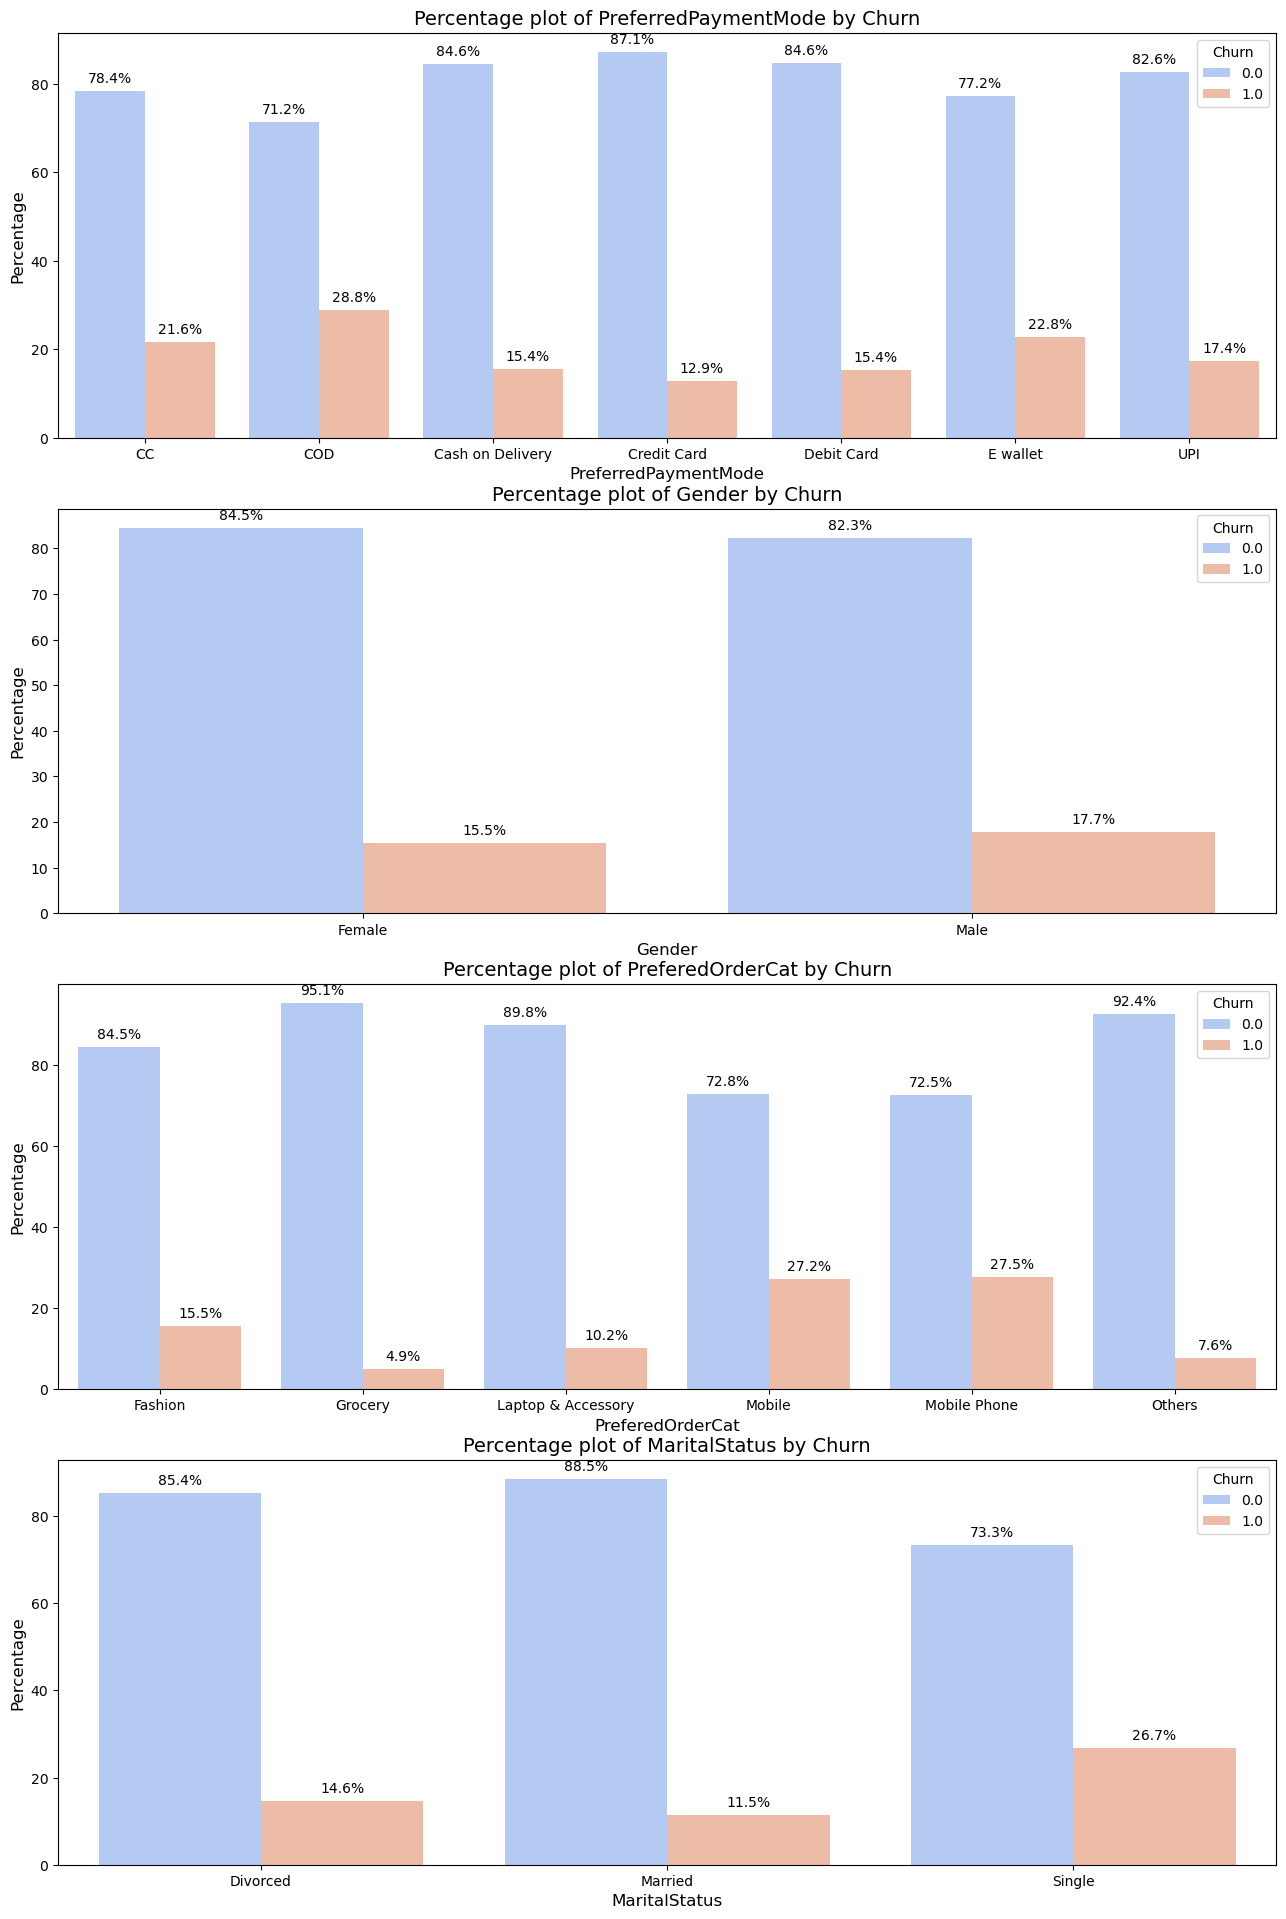

In [31]:
import matplotlib.pyplot as plt

# Recreating the subplot with percentages displayed above each bar

fig, axes = plt.subplots(nrows=len(categorical_columns)-1, ncols=1, figsize=(14, 20))  # Adjusted the number of rows
plt.tight_layout(pad=5.0, h_pad=3.0)

# Function to add labels on the bars
def add_percentage_labels(ax, data):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')

for i, col in enumerate(categorical_columns[1:]):  # Skip the first column which is 'Churn'
    col_data = final_data.groupby(col)['Churn'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
    sns.barplot(x=col, y='percentage', hue='Churn', data=col_data, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'Percentage plot of {col} by Churn', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Percentage', fontsize=12)
    axes[i].legend(title='Churn', loc='upper right')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)
    add_percentage_labels(axes[i], col_data)

plt.show()


1. Payment mode: It can be seen that the Credit Card and Debit Card users have a lower churn rate compared to other payment methods. Users with Cash on Delivery and E-wallets have a higher churn rate. This suggests that customer who go with traditional payment methods like credit/debit cards are more satisfied or maybe more loyal.

2. Gender : It can be seen that the customers who have churn are male most of the time and female least time. This patterns tells that there is a need in understanding the specific needs and behaviors of male customers, why they are more likely to churn, and how the service or product can be better personalized to retain them. Parallely, exploring why female customers are less likely to churn could give insights for overall customer retention strategies.

3. Preferred order Category : It can be seen that the customers who have high churn rates bought fashion and grocery. And also it can be seen for customers who have less churn rates bought Mobile phone. This suggests that customers purchasing products like mobile phones are more likely to be repeat customers, whereas those purchasing more low involvement products may not be as loyal.

4. Marital Status : It can be seen that the customers who have churn are Single most of the time and divorced least of the time. And also it can be seen same for customer who have not churn are Married most of the time and divorced least of the time. The needs for Married and singles might be different, Like being single involves more transitions like moving, career changes which could affect their loyalty to a service. where as Married customers might live a more stable life, where changes in service provide is very less. Hence these insights can help us on providing tailored services to married and single customers.

**In concluding data exploration of categorical analysis, provides some suggestions which can be implemented in companies. Suggestions such as enchantment's in payment processing , a need for investigation of male customers and based on that tailor personalized retention strategies.**

### Class Imbalance Problem

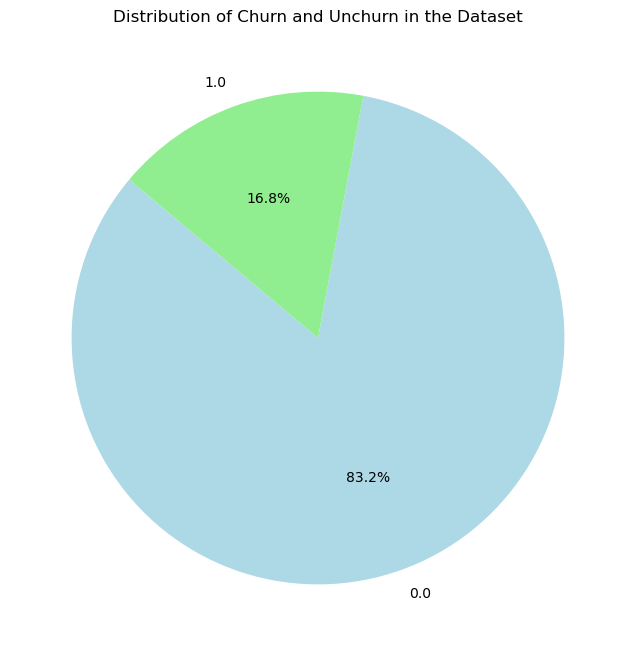

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the values of churn and unchurn
churn_counts = final_data['Churn'].value_counts()

# Plotting a pie chart for the churn distribution
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen'])
plt.title('Distribution of Churn and Unchurn in the Dataset')
plt.show()


As it can be seen above visually and also in descriptive statistics that approximately 83% of the individuals in the dataset are not churn , while the remaining 17% are churn. This means there is a class imbalance in dataset.Lets deal with this in Modeling section of this report.


Out of all the people we have data on, about 83 out of every 100 people (or 83%) are staying with the service or product without leaving. They're happy and not planning to leave.

On the other hand, around 17 out of every 100 people (or 17%) have decided to leave or stop using the service or product. They're the ones we refer to as "churned."

Understanding these percentages helps us know how many people are happy and sticking around versus those who have chosen to leave.

### Handling Class imbalance Problem

In [ ]:
pip install scikit-learn imbalanced-learn

In [49]:
final_data_copy

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,HasMissing,CustomerID,Churn,Tenure,CityTier,...,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,0,0,0,0,0,False,50001.0,1.0,4.0,3.0,...,3.0,3.0,2.0,9.0,1.0,11.0,0.693147,0.693147,1.791759,159.93
1,1,1,1,1,0,True,50002.0,1.0,2.6,1.0,...,3.0,4.0,3.0,7.0,1.0,15.0,0.000000,0.693147,0.000000,120.90
2,1,0,1,1,0,True,50003.0,1.0,2.6,1.0,...,2.0,4.0,3.0,6.0,1.0,14.0,0.000000,0.693147,1.386294,120.28
3,1,0,1,0,0,False,50004.0,1.0,0.0,3.0,...,2.0,4.0,5.0,8.0,0.0,23.0,0.000000,0.693147,1.386294,134.07
4,1,2,1,1,0,True,50005.0,1.0,0.0,1.0,...,2.6,3.0,5.0,3.0,0.0,11.0,0.693147,0.693147,1.386294,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,2,6,1,0,2,False,55626.0,0.0,10.0,1.0,...,3.0,2.0,1.0,6.0,0.0,18.0,0.693147,1.098612,1.609438,150.71
5626,0,6,1,4,2,True,55627.0,0.0,13.0,1.0,...,3.0,5.0,5.0,6.0,0.0,16.0,0.693147,1.098612,1.435085,224.91
5627,0,0,1,0,2,False,55628.0,0.0,1.0,1.0,...,3.0,2.0,4.0,3.0,1.0,21.0,0.693147,1.098612,1.609438,186.42
5628,2,6,1,0,2,False,55629.0,0.0,23.0,3.0,...,4.0,5.0,4.0,4.0,0.0,15.0,1.098612,1.098612,2.302585,178.90


In [54]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming final_data_copy is your original dataset
# Prepare the features and target variable
X = final_data_copy.drop(['Churn','CustomerID','HasMissing'], axis=1)
y = final_data_copy['Churn']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying SMOTE
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

# Now you can use X_train_res, y_train_res for further model training


### Verifying the SMOTE Method

In [113]:
import numpy as np

# Assuming y_train_res is your resampled target variable from the SMOTE application

# Counting the occurrences of each class in the resampled target variable
unique, counts = np.unique(y_train_res, return_counts=True)
class_distribution = dict(zip(unique, counts))

print("Class Distribution after applying SMOTE:")
for class_label, count in class_distribution.items():
    print(f"Class {class_label}: {count}")

# Calculating the percentage of each class
total_samples = len(y_train_res)
for class_label, count in class_distribution.items():
    percentage = (count / total_samples) * 100
    print(f"Class {class_label}: {percentage:.2f}%")


Class Distribution after applying SMOTE:
Class 0.0: 3258
Class 1.0: 3258
Class 0.0: 50.00%
Class 1.0: 50.00%


## Feature importance modeling based on Random Forest ouput

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  # Importing Support Vector Classifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Assuming final_data_copy is your original dataset
# Select only the important features
important_features = ['Tenure', 'CashbackAmount', 'WarehouseToHome', 'NumberOfAddress', 
                      'DaySinceLastOrder', 'Complain']
X_f_model = final_data_copy[important_features]
y_f_model = final_data_copy['Churn']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_f_model, y_f_model, test_size=0.3, random_state=12)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying SMOTE
sm = SMOTE(random_state=12)
X_train_res_f, y_train_res_f = sm.fit_resample(X_train_scaled, y_train)

# Initialize the models
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
lr = LogisticRegression(random_state=42, max_iter=1000)
svm = SVC(random_state=42)  # Initializing the SVM model

# List of models
models = [rf, gb, lr, svm]
model_names = ['Random Forest', 'Gradient Boosting', 'Logistic Regression', 'Support Vector Machine']

# Loop through models to train and predict
for i, model in enumerate(models):
    model.fit(X_train_res_f, y_train_res_f)  # Train on resampled training data
    y_pred_f = model.predict(X_test_scaled)  # Predict on the test data
    
    print(f"Model: {model_names[i]}")
    print("Accuracy:", accuracy_score(y_test, y_pred_f))
    print("Recall score:", recall_score(y_test, y_pred_f))
    print("Classification Report:")
    print(classification_report(y_test, y_pred_f))
    print("="*60)


Model: Random Forest
Accuracy: 0.9478981645944345
Recall score: 0.8603773584905661
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      1424
         1.0       0.82      0.86      0.84       265

    accuracy                           0.95      1689
   macro avg       0.90      0.91      0.90      1689
weighted avg       0.95      0.95      0.95      1689

Model: Gradient Boosting
Accuracy: 0.8549437537004144
Recall score: 0.7849056603773585
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91      1424
         1.0       0.53      0.78      0.63       265

    accuracy                           0.85      1689
   macro avg       0.74      0.83      0.77      1689
weighted avg       0.89      0.85      0.87      1689

Model: Logistic Regression
Accuracy: 0.7554766133806986
Recall score: 0.7811320754716982
Classification Report:
              prec

## Feature importance modeling based on Recursive Feature Elimination

In [110]:
# Assuming final_data_copy is your original dataset
# Select only the important features
important_features = ['PreferredLoginDevice', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 
                      'CityTier', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'Complain','OrderCount' 
                      ,'DaySinceLastOrder', 'PreferedOrderCat']
X_r_model = final_data_copy[important_features]
y_r_model = final_data_copy['Churn']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_r_model, y_r_model, test_size=0.3, random_state=12)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying SMOTE
sm = SMOTE(random_state=12)
X_train_res_r, y_train_res_r = sm.fit_resample(X_train_scaled, y_train)

# Initialize the models
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
lr = LogisticRegression(random_state=42, max_iter=1000)
svm = SVC(random_state=42)  # Initializing the SVM model

# List of models
models = [rf, gb, lr, svm]
model_names = ['Random Forest', 'Gradient Boosting', 'Logistic Regression', 'Support Vector Machine']

# Loop through models to train and predict
for i, model in enumerate(models):
    model.fit(X_train_res_r, y_train_res_r)  # Train on resampled training data
    y_pred_r = model.predict(X_test_scaled)  # Predict on the test data
    
    print(f"Model: {model_names[i]}")
    print("Accuracy:", accuracy_score(y_test, y_pred_r))
    print("Classification Report:")
    print("Recall score:", recall_score(y_test, y_pred_r))
    print(classification_report(y_test, y_pred_r))
    print("="*60)

Model: Random Forest
Accuracy: 0.9242155121373594
Classification Report:
Recall score: 0.7018867924528301
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      1424
         1.0       0.79      0.70      0.74       265

    accuracy                           0.92      1689
   macro avg       0.87      0.83      0.85      1689
weighted avg       0.92      0.92      0.92      1689

Model: Gradient Boosting
Accuracy: 0.8590882178804026
Classification Report:
Recall score: 0.5169811320754717
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92      1424
         1.0       0.55      0.52      0.54       265

    accuracy                           0.86      1689
   macro avg       0.73      0.72      0.73      1689
weighted avg       0.86      0.86      0.86      1689

Model: Logistic Regression
Accuracy: 0.7140319715808171
Classification Report:
Recall score: 0.7169811320754716
              prec

In [ ]:
PreferredLoginDevice: 1
Gender: 1
PreferedOrderCat: 1
MaritalStatus: 1
CityTier: 1
NumberOfDeviceRegistered: 1
SatisfactionScore: 1
Complain: 1
OrderCount: 1
DaySinceLastOrder: 1
Tenure: 2
NumberOfAddress: 3
HourSpendOnApp: 4
WarehouseToHome: 5
CouponUsed: 6
OrderAmountHikeFromlastYear: 7
CashbackAmount: 8
PreferredPaymentMode: 9

### Feature importance modeling based on Permutation Importance

In [129]:
# Assuming final_data_copy is your original dataset
# Select only the important features
important_features = ['Tenure', 'Complain' , 'DaySinceLastOrder', 'CashbackAmount' ,
                      'NumberOfAddress']
X_p_model = final_data_copy[important_features]
y_p_model = final_data_copy['Churn']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_p_model, y_p_model, test_size=0.3, random_state=12)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying SMOTE
sm = SMOTE(random_state=12)
X_train_res_p, y_train_res_p = sm.fit_resample(X_train_scaled, y_train)

# Initialize the models
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
lr = LogisticRegression(random_state=42, max_iter=1000)
svm = SVC(random_state=42,probability=True)  # Initializing the SVM model

# List of models
models = [rf, gb, lr, svm]
model_names = ['Random Forest', 'Gradient Boosting', 'Logistic Regression', 'Support Vector Machine']

# Loop through models to train and predict
for i, model in enumerate(models):
    model.fit(X_train_res_p, y_train_res_p)  # Train on resampled training data
    y_pred_p = model.predict(X_test_scaled)  # Predict on the test data
    
    print(f"Model: {model_names[i]}")
    print("Accuracy:", accuracy_score(y_test, y_pred_p))
    print("Precision score:", precision_score(y_test, y_pred_p))
    print("Recall score:", recall_score(y_test, y_pred_p))
    print("f1 score:", f1_score(y_test, y_pred_p))
    print("Classification Report:")
    print(classification_report(y_test, y_pred_p))
    print("="*60)
    print(y_test.shape)

Model: Random Forest
Accuracy: 0.9550029603315572
Precision score: 0.8436363636363636
Recall score: 0.8754716981132076
f1 score: 0.8592592592592594
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      1424
         1.0       0.84      0.88      0.86       265

    accuracy                           0.96      1689
   macro avg       0.91      0.92      0.92      1689
weighted avg       0.96      0.96      0.96      1689

Model: Gradient Boosting
Accuracy: 0.8484310242747187
Precision score: 0.5104408352668214
Recall score: 0.8301886792452831
f1 score: 0.632183908045977
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.85      0.90      1424
         1.0       0.51      0.83      0.63       265

    accuracy                           0.85      1689
   macro avg       0.74      0.84      0.77      1689
weighted avg       0.89      0.85      0.86      1689

M

In [131]:
print(y_test.shape)

(1689,)


In [132]:
print(X_train.shape)

(3941, 5)


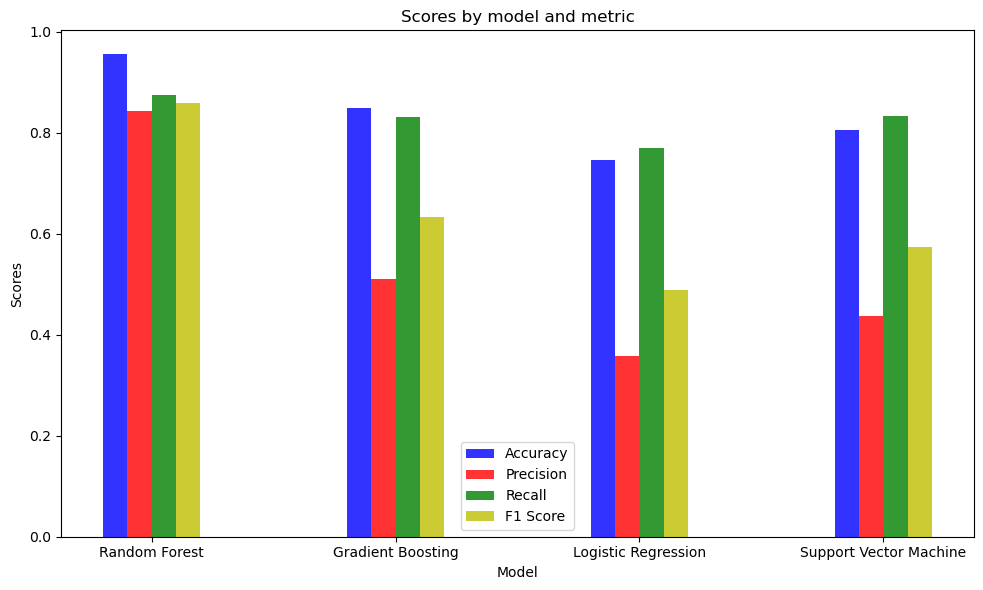

In [128]:
import matplotlib.pyplot as plt
import numpy as np

# ... [rest of your existing code where you calculate the metrics] ...

# Number of groups (number of models)
n_groups = len(models)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define the bar width
bar_width = 0.1

# Define the opacity
opacity = 0.8

# Define the positions of the bars
index = np.arange(n_groups)

# Plot each metric
rects1 = ax.bar(index, accuracy_scores.values(), bar_width,
                alpha=opacity, color='b', label='Accuracy')

rects2 = ax.bar(index + bar_width, precision_scores.values(), bar_width,
                alpha=opacity, color='r', label='Precision')

rects3 = ax.bar(index + 2 * bar_width, recall_scores.values(), bar_width,
                alpha=opacity, color='g', label='Recall')

rects4 = ax.bar(index + 3 * bar_width, f1_scores.values(), bar_width,
                alpha=opacity, color='y', label='F1 Score')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Scores by model and metric')
ax.set_xticks(index + bar_width + bar_width / 2)
ax.set_xticklabels(model_names)
ax.legend()

# Make the layout more compact
plt.tight_layout()

# Display the plot
plt.show()


In [117]:
from sklearn.svm import SVC

# Example for an SVM model
model = SVC(probability=True)  # Enable probability estimates
# ... (rest of your code for training the model)

# ROC Comparision

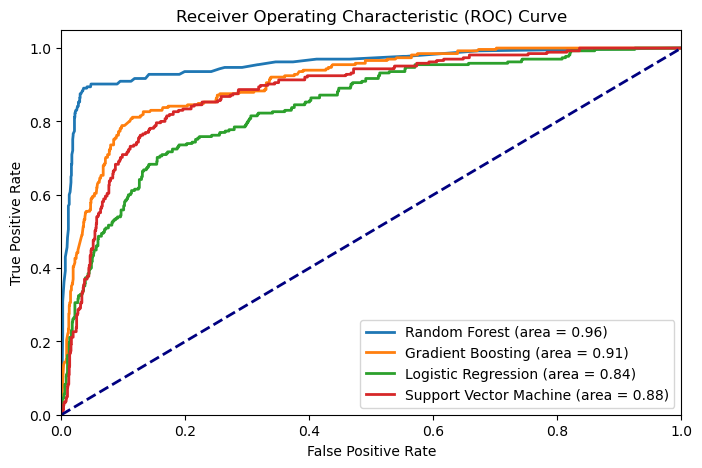

In [120]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming the models and test data are already defined and models have been trained as per the provided code

# Plotting ROC Curve for each model
plt.figure(figsize=(8, 5))

for i, model in enumerate(models):
    # Compute the probability scores
    probas_ = model.predict_proba(X_test_scaled)
    
    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{model_names[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


As shown of ROC curve analysis, the random forest model demonstrates the best performance in terms of distinguishing between the classes(such as churn and non-churn), as indicated by its highest area under the curve(AUC).This suggests that the random forest model has a better balance between true positive and false positive rates compared to other models. Gradient Boosting follows closely indicating good, but slightly lower performance. Meanwhile, logistic regression and support vector machine shows the least performance  as evidence by their lower auc values. This suggests that these models might not be as good at correctly classifying the two groups for the specific data set.

## Confusion Matrix for each Model

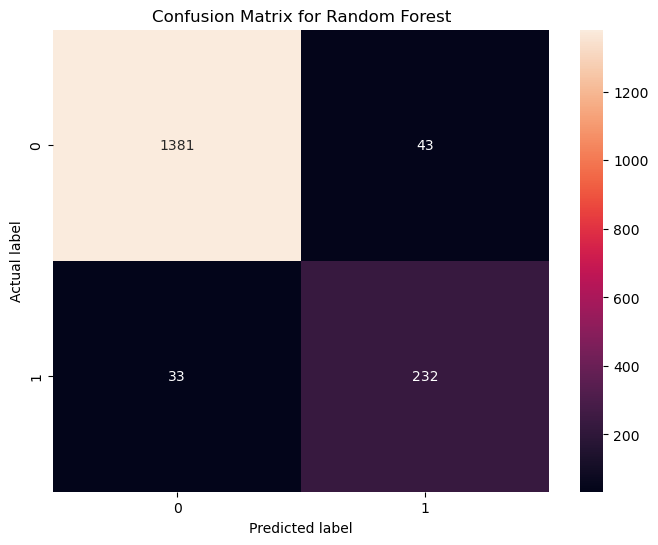

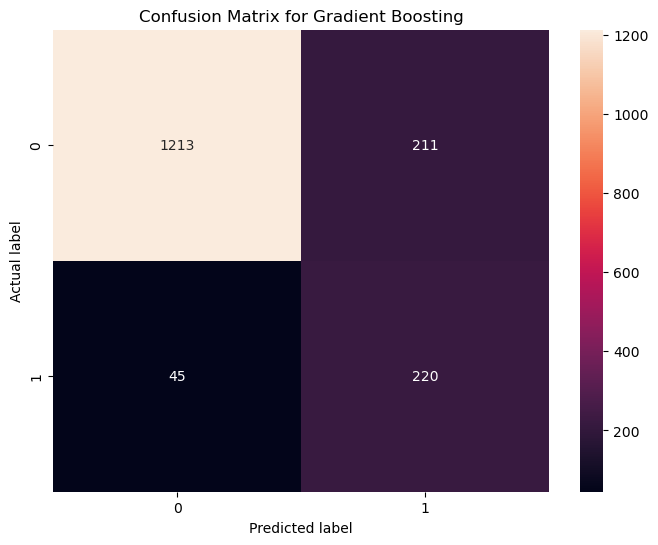

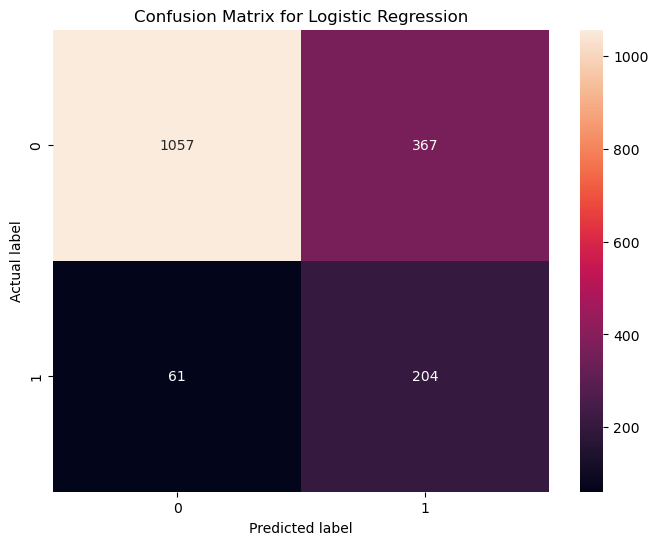

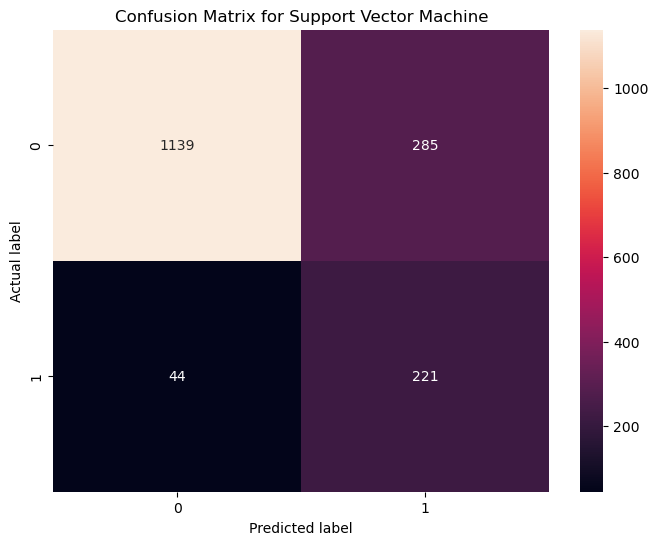

In [107]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming the models are already trained and predictions are made as per the provided code

for i, model in enumerate(models):
    y_pred_c = model.predict(X_test_scaled)  # Predict on the test data
    cm = confusion_matrix(y_test, y_pred_c)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f'Confusion Matrix for {model_names[i]}')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()



**Random Forest Result**

As shown, overall model has performed good in terms of all the metrices with accuracy of 96\%, precision of 84\%, Recall of 87\% and f1 score of 86\%. It looks like model was better at evaluating non churn compared to churn, but compared to all other models all the matrices are nearly balanced in predicting both classes. The value of precision is the highest, when it was predicting non-churn compared to all other metrices.

From the Confusion matrix, it can be seen the model is good at identifying churn and non-churn as evident by its high True Negative and True Positive. And it also has a low false negative and false positive. The  total error rate of the model is 
((FN + FP)/Total) * 100 =  4.5\% . As primary focus is to know about False negative, Where random Forest has the lowest False Negative(33) out of all the other models to be discussed. And the percentage of False negative will be (FN/(TP+TN+FP))*100 = 1.95\%.


**Gradient Boosting Result**

As shown, The model has performed good in terms of accuracy of 85\% compared to other metrices such as precision of 51\%, Recall of 83\% and f1 score of 63\%. The model looks to be biased, as it is able to predict non churn more than churn, and this was pronounced on precision with a very low value of 51\%. Recall seems to be balanced here in predicting both the classes.

From the Confusion matrix, it can be seen the model has good True Negative and True Positive but less compared to Random Forest. And it has a low false negative(45) value of 2.66\% but more when compared with Random Forest . The  total error rate of the model is ((FN + FP)/Total) * 100 =  15.15\% , which is higher compared to Random Forest. Additionally it can be noticed it has high False Positive(211) compared to Random Forest.


**Logistic Regression Result**


As shown, The model has performed better in terms of recall of 77\% compared to other metrices such as precision of 36\%, accuracy of 75\% and f1 score of 49\%. The Results exhibits similar pattern where the model looks to be biased, as it is able to predict non churn more than churn, and this was pronounced on precision with a very low value of 36\%. Similarly the Recall is nearly balanced in predicting both the class as Gradient Boost. Logistic Regression shows similar characteristics as Gradient Boost, but Logistic Regression performs poor.

From the Confusion matrix, it can be seen the model has lower value for True Negative and True Positive compared to all other models. This model has the highest false negative(61) value of 3.61\% . The  total error rate of the model is ((FN + FP)/Total) * 100 =  25.34\% , which is the highest out of all model. Additionally it can be noticed it has high False Positive(367) compared to all other models.


**Support Vector Machine Result**

As shown, The model has performed better in terms of recall of 83\% compared to other metrices such as precision of 44\%, accuracy of 80\% and f1 score of 57\%. The Results exhibits similar pattern where the model looks to be biased, as it is able to predict non churn more than churn, and this was pronounced on precision with a very low value of 44\%. Similarly the Recall is nearly balanced in predicting both the class as Gradient Boost. Support Vector Machine shows similar characteristics as Logistic Regression, but Support Vector Machine performs better.

From the Confusion matrix, it can be seen the model has lower value for True Negative and True Positive compared to Random Forest. This model has the lower false negative(44) value of 2.61\% compared to gradient boost and logistic regression . The  total error rate of the model is ((FN + FP)/Total) * 100 =  19.47\% , which lower than Support Vector Machines total error rate. Additionally it can be noticed that False Positive(285) value is lesser compared to Logistic Regression.

**Reson for doing factorization here**

Doing the factorization later as while doing visualization categorical values are required for analysis
final_data use it for visualization, as not factorized and can plot graphs for categorial columns.

final_data_copy is factorized below ,and now it is ready to be used for feature importance , class imbalance and modeling.


#### Converting Categorical Data to Numerical Representation:

In the dataset, certain columns contain categorical data, which are non-numeric values representing categories or labels.
To utilize these columns effectively in machine learning algorithms, it is essential to convert them into a numerical format. This process, known as "categorical encoding" or "factorization," transforms categories into unique numerical identifiers, enabling the algorithms to interpret and use the data appropriately.

Identified five categorical columns for this transformation, namely:

- PreferredLoginDevice
- PreferredPaymentMode
- Gender
- PreferedOrderCat
- MaritalStatus

The pd.factorize() function was employed, assigning a unique numerical value to each distinct category within the columns. This conversion maintains the intrinsic relationship between the categories while representing them in a format suitable for computational analysis and modeling.


In [41]:
# List of categorical columns to be factorized
categorical_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

# Factorize the categorical columns
for column in categorical_columns:
    final_data_copy[column] = pd.factorize(final_data_copy[column])[0]

# Print the DataFrame after factorization
final_data_copy

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,HasMissing,CustomerID,Churn,Tenure,CityTier,...,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,0,0,0,0,0,False,50001.0,1.0,4.0,3.0,...,3.0,3.0,2.0,9.0,1.0,11.0,0.693147,0.693147,1.791759,159.93
1,1,1,1,1,0,True,50002.0,1.0,2.6,1.0,...,3.0,4.0,3.0,7.0,1.0,15.0,0.000000,0.693147,0.000000,120.90
2,1,0,1,1,0,True,50003.0,1.0,2.6,1.0,...,2.0,4.0,3.0,6.0,1.0,14.0,0.000000,0.693147,1.386294,120.28
3,1,0,1,0,0,False,50004.0,1.0,0.0,3.0,...,2.0,4.0,5.0,8.0,0.0,23.0,0.000000,0.693147,1.386294,134.07
4,1,2,1,1,0,True,50005.0,1.0,0.0,1.0,...,2.6,3.0,5.0,3.0,0.0,11.0,0.693147,0.693147,1.386294,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,2,6,1,0,2,False,55626.0,0.0,10.0,1.0,...,3.0,2.0,1.0,6.0,0.0,18.0,0.693147,1.098612,1.609438,150.71
5626,0,6,1,4,2,True,55627.0,0.0,13.0,1.0,...,3.0,5.0,5.0,6.0,0.0,16.0,0.693147,1.098612,1.435085,224.91
5627,0,0,1,0,2,False,55628.0,0.0,1.0,1.0,...,3.0,2.0,4.0,3.0,1.0,21.0,0.693147,1.098612,1.609438,186.42
5628,2,6,1,0,2,False,55629.0,0.0,23.0,3.0,...,4.0,5.0,4.0,4.0,0.0,15.0,1.098612,1.098612,2.302585,178.90


As it can be seen , now all comun values are numerical. Which is required for correlation analysis feature importance , class imbalance and modeling

### 3. Feature Importance

#### 3.1. Tree-based Methods (Random Forest)


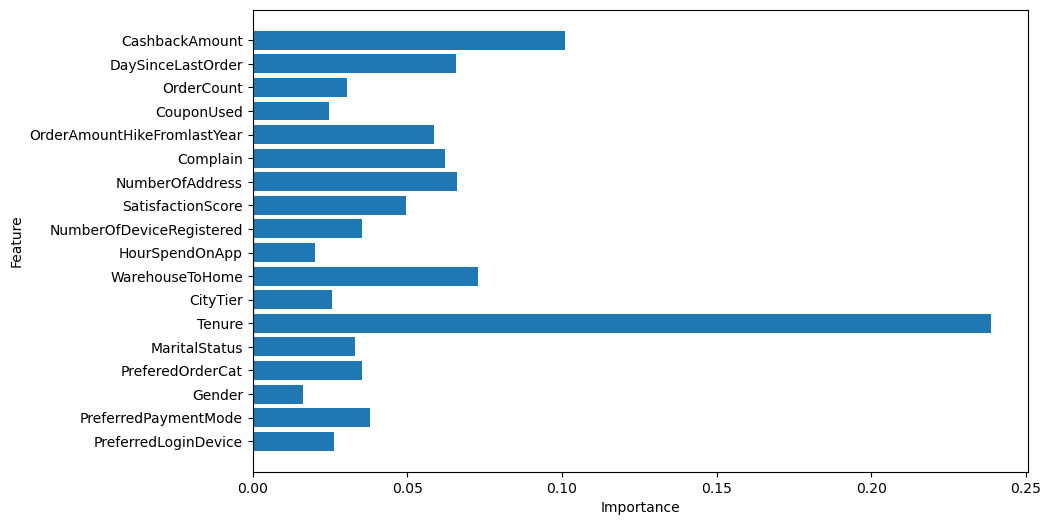

In [47]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Prepare the features and target variable
X_imp_1 = final_data_copy.drop(['Churn','CustomerID','HasMissing'], axis=1)
y_imp_1 = final_data_copy['Churn']

# Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# Fit the model
rf.fit(X_imp_1, y_imp_1)

# Get feature importances
importances = rf.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


As shown in figure the important features as per Random forest are in the order Tenure, CashbackAmount, WarehouseToHome, NumberOfAddress, DaySinceLastOrder, Complain, OrderAmountHikeFromlastYear, SatisfactionScore. Tenure being most important feature suggests that the duration for which customer is using company services is crucial feature. Long term customers might show greater loyalty because satisfaction they get. Similarly CashbackAmount feature tells that customers are liking the cashback offers and financial benefits they get. WarehouseToHome indicates that delivery time plays a significant role on customer churn. In the same way rest of the important features have a important role in predicting churn as per Tree based algorithm.

#### 3.2. Recursive Feature Elimination (RFE)

In [49]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# Assuming X is your feature matrix and y is the target variable
# Let's assume that your feature columns are stored in a variable called feature_cols
feature_cols = X.columns.tolist()


# Create a logistic regression model with increased number of iterations
model = LogisticRegression(max_iter=1000)  # Increase the number of iterations to 1000

# Create RFE model and fit it to your data
rfe = RFE(model)

rfe.fit(X_imp_1, y_imp_1)

ranking = rfe.ranking_

# Create a dictionary that will hold the feature names and their corresponding ranking
feature_ranking_dict = dict(zip(feature_cols, ranking))

# Sort the dictionary based on the ranking
sorted_feature_ranking = {k: v for k, v in sorted(feature_ranking_dict.items(), key=lambda item: item[1])}

# To display it in a more readable format, you can loop through the sorted dictionary:
for feature, rank in sorted_feature_ranking.items():
  print(f"{feature}: {rank}")

# Uncomment and run these lines after fitting the RFE model. It will print each feature name alongside its rank.


PreferredLoginDevice: 1
Gender: 1
MaritalStatus: 1
CityTier: 1
NumberOfDeviceRegistered: 1
SatisfactionScore: 1
Complain: 1
OrderCount: 1
DaySinceLastOrder: 1
PreferedOrderCat: 2
Tenure: 3
NumberOfAddress: 4
HourSpendOnApp: 5
WarehouseToHome: 6
CouponUsed: 7
OrderAmountHikeFromlastYear: 8
CashbackAmount: 9
PreferredPaymentMode: 10


As shown, it can be seen that features related to customer's login device, gender, order preferences, marital status, city tier, number of devices registered, satisfaction score, complaints, order count, and day since the last order are critical in predictive modeling. But where as features like cashback amount and preferred payment mode are less important in this data set and model.

#### 3.3 Permutation Importance

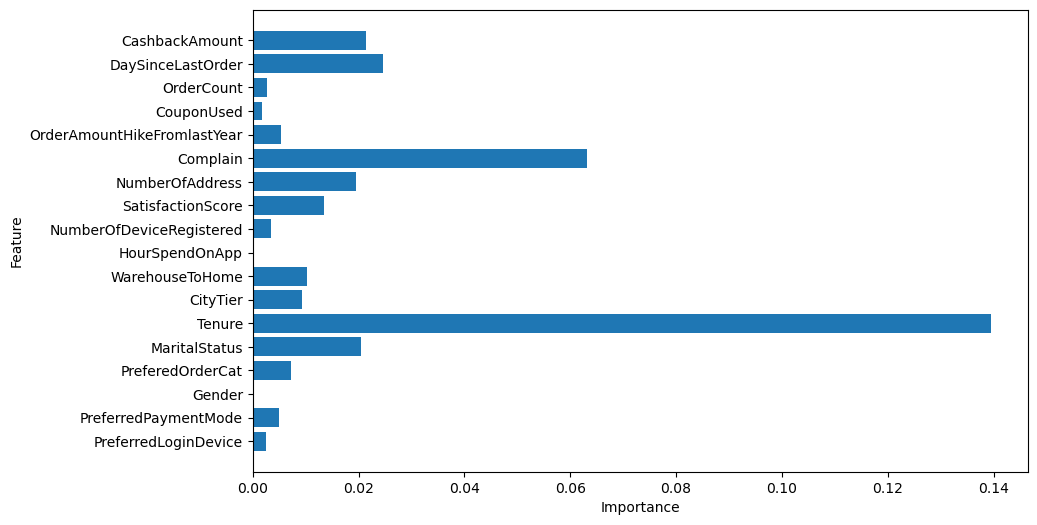

In [51]:
from sklearn.inspection import permutation_importance

# Perform permutation importance
result = permutation_importance(rf, X_imp_1, y_imp_1 , n_repeats=30)

# Get importances
importances = result.importances_mean

# Plot
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


As shown in the important features as per Permutation are Tenure, Complain , DaySinceLastOrder, CashbackAmount ,NumberOfAddress , Marital status, SatisfactionScore. It can also be seen that OrderCount and Coupon used are closer to each other in plot, which again proves that they have a linearity as discussed in correlation analysis. This will impact on models generalization due to the dependency of features on each other. Hence in this scenario its good to not consider these both features in modeling.
After using these five features as input for the model the accuracy or recall metrics was similar to the basic model with 19 features. Which will be discussed in depth in pre-model analysis section.


## Basic Modeling without Feature Importance

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  # Importing Support Vector Classifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the models
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
lr = LogisticRegression(random_state=42, max_iter=1000)
svm = SVC(random_state=42)  # Initializing the SVM model

# List of models
models = [rf, gb, lr, svm]
model_names = ['Random Forest', 'Gradient Boosting', 'Logistic Regression', 'Support Vector Machine']

# Loop through models to train and predict
for i, model in enumerate(models):
    model.fit(X_train_res, y_train_res)  # Train on resampled training data
    y_pred_Normal = model.predict(X_test_scaled)  # Predict on the test data
    
    print(f"Model: {model_names[i]}")
    print("Accuracy:", accuracy_score(y_test, y_pred_Normal))
    print("Recall score:", recall_score(y_test, y_pred_Normal))
    print("Classification Report:")
    print(classification_report(y_test, y_pred_Normal))
    print("="*60)


Model: Random Forest
Accuracy: 0.9638839550029603
Recall score: 0.8641509433962264
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      1424
         1.0       0.90      0.86      0.88       265

    accuracy                           0.96      1689
   macro avg       0.94      0.92      0.93      1689
weighted avg       0.96      0.96      0.96      1689

Model: Gradient Boosting
Accuracy: 0.9023090586145648
Recall score: 0.7660377358490567
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94      1424
         1.0       0.66      0.77      0.71       265

    accuracy                           0.90      1689
   macro avg       0.81      0.85      0.83      1689
weighted avg       0.91      0.90      0.91      1689

Model: Logistic Regression
Accuracy: 0.7880402605091771
Recall score: 0.8037735849056604
Classification Report:
              prec

## Conclusion

The analysis presents Random Forest as the most effective model, displaying high accuracy and balanced metrices across different feature selection methods. It excels in minimizing false negatives, which is crucial for churn prediction. In comparison, other models, while competent show a higher tendency towards non-churn more accurately than churn. The study highlights the importance of model selection in predicting customer behaviour and suggest that while models have their strengths, Random Forest's robustness makes it particularly suited for churn prediction in e-commerce.

Future research could explore hyper parameter tuning, which was not conducted in this study. Tuning could potentially enhance the performance of the Gradient Boost and Support Vector Machine models, possibly even surpassing Random Forest. Additionally, testing these models on different data sets is recommended to ensure generalization ability and good performance. Further study should focus on expanding the data set variety to validate model's efficiency across different customer behaviours and e-commerce environments. 